In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.shape

(3586, 67)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/
Liabilities     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

C:\Users\vivek\AppData\Local\Temp/ipykernel_11604/2943364827.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')


In [9]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [10]:
df['default']=np.where((df['Networth_Next_Year']>0),0,1)

In [11]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


In [12]:
df.drop(['Co_Code','Co_Name','Networth_Next_Year'],axis=1,inplace=True)

In [13]:
df.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_\nLiabilities,Gross_Sales,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1


In [14]:
df.shape

(3586, 65)

Treating Missing values

In [15]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [16]:
df_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_\nLiabilities,Gross_Sales,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


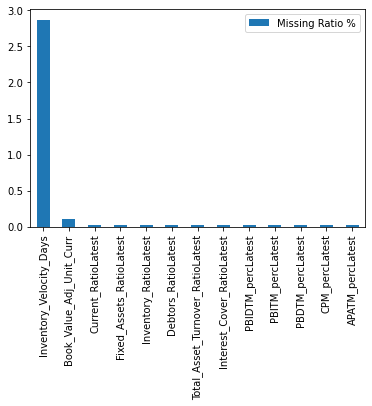

In [17]:
import matplotlib.pyplot as plt
def plot_nas(df_X: pd.DataFrame):
    if df_X.isnull().sum().sum() != 0:
        na_df = (df_X.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_X)

Replacing missing values with median

In [18]:
for column in df_X.columns:
    if df_X[column].dtype != 'object':
        median = df_X[column].median()
        df_X[column] = df_X[column].fillna(median)

In [19]:
df_X.isnull().sum().sum()

0

In [20]:
import matplotlib.pyplot as plt
def plot_nas(df_X: pd.DataFrame):
    if df_X.isnull().sum().sum() != 0:
        na_df = (df_X.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df_X)

No NAs found


In [21]:
for cols in df_X.columns:
    if df_X[cols].nunique()==1:
        print('Column name is '+cols+' and its unique value count is : '+ str(df_X[cols].nunique()))

In [22]:
df_X.drop('Capital_expenses_in_forex',axis=1, inplace=True)
df_X.drop('ROG_Revenue_earnings_in_forex_perc',axis=1, inplace=True)
df_X.drop('ROG_Revenue_expenses_in_forex_perc',axis=1, inplace=True)

In [23]:
df_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_\nLiabilities,Gross_Sales,...,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [24]:
df_X.shape

(3586, 61)

In [25]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

for i in df_X:
    LL,UL=remove_outlier(df_X[i])
    df_X[i]=np.where(df_X[i]>UL,UL,df_X[i])
    df_X[i]=np.where(df_X[i]<LL,LL,df_X[i])

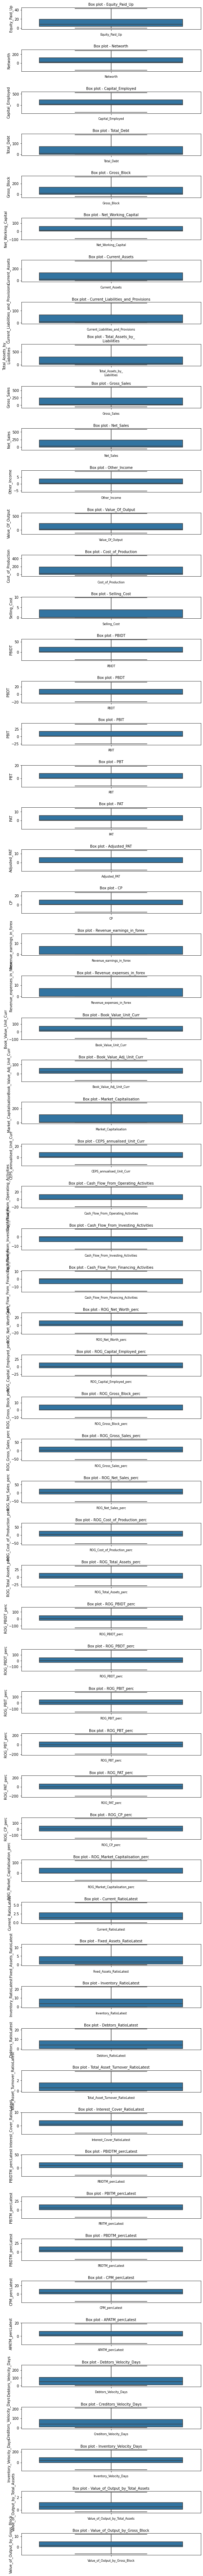

In [26]:
col_names = list(df_X.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    plt.tight_layout()

plt.show()

Concating df_X and df_Y to build model.

In [27]:
df=pd.concat([df_X,df_Y],axis=1)

In [28]:
df.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_\nLiabilities,Gross_Sales,...,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,109.6000,0.00000,...,0.0000,0.00,0.00000,0.00000,0.0,0.0,45.0,0.00,0.00,1
1,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,...,-21.4275,-21.15,-17.08125,-11.11125,29.0,101.0,2.0,0.31,0.24,1
2,43.16875,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,392.13000,...,-21.4275,-21.15,-17.08125,-11.11125,97.0,210.5,0.0,-0.03,-0.26,1
3,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,...,-7.2100,-21.15,-17.08125,-11.11125,93.0,63.0,2.0,0.24,1.90,1
4,43.16875,-166.215,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,38.72000,...,-21.4275,-21.15,28.46875,18.51875,253.0,210.5,0.0,0.01,0.05,1


In [29]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [30]:
df["default"].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64